# Imports

In [3]:
# base
import numpy as np
import pkg_resources
from sklearn.impute import SimpleImputer
from pandas_plink import read_plink

# viz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs

# feems
from feems.utils import prepare_graph_inputs
from feems import SpatialGraph, Viz
from feems.cross_validation import run_cv
from feems import Objective

# change matplotlib fonts
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.sans-serif"] = "Arial"

# Data

In [4]:
data_path = pkg_resources.resource_filename("feems", "data/")

# read the genotype data and mean impute missing data
(bim, fam, G) = read_plink("{}/wolvesadmix".format(data_path))
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
genotypes = imp.fit_transform((np.array(G)).T)

# setup graph
coord = np.loadtxt("{}/wolvesadmix.coord".format(data_path))  # sample coordinates
outer = np.loadtxt("{}/wolvesadmix.outer".format(data_path))  # outer coordinates
grid_path = "{}/grid_100.shp".format(data_path)  # path to discrete global grid

# graph input files
outer, edges, grid, _ = prepare_graph_inputs(coord=coord, 
                                             ggrid=grid_path,
                                             translated=True, 
                                             buffer=0,
                                             outer=outer)

# construct spatial graph object
sp_graph = SpatialGraph(genotypes, coord, grid, edges, scale_snps=True)

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 20.49it/s]


# Visualize

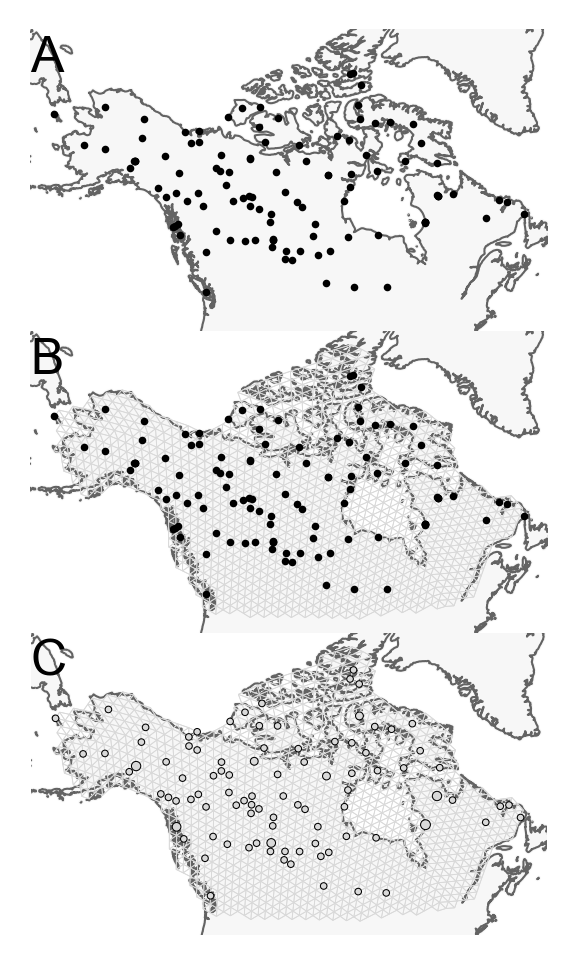

In [20]:
projection = ccrs.EquidistantConic(central_longitude=-108.842926, central_latitude=66.037547)
title_loc = "left"
title_pad = "-10"
title_fontsize = 12

# setup figure
fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(
    ncols=1, nrows=3, figure=fig, wspace=0.0, hspace=0.0
)

# axis 00
ax_00 = fig.add_subplot(spec[0, 0], projection=projection)
ax_00.set_title("A", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
v = Viz(ax_00, sp_graph, projection=projection, edge_width=0.0, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=7, 
        obs_node_size=3.5, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_samples()

# axis 10
ax_10 = fig.add_subplot(spec[1, 0], projection=projection)
ax_10.set_title("B", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
v = Viz(ax_10, sp_graph, projection=projection, edge_width=0.2, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=7, 
        obs_node_size=3.5, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=False)
v.draw_samples()

# axis 20
ax_20 = fig.add_subplot(spec[2, 0], projection=projection)
ax_20.set_title("C", loc=title_loc, pad=title_pad, 
                fontdict={"fontsize": title_fontsize})
v = Viz(ax_20, sp_graph, projection=projection, edge_width=0.2, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=7, 
        obs_node_size=2.5, obs_node_linewidth=.25, 
        sample_pt_color="black", cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=False)
v.draw_obs_nodes(use_ids=False)

In [21]:
fig.savefig(
    "../output/figures/supp-figure-1-grid-schematic.pdf", bbox_inches="tight", pad_inches=.1
)